### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
from src.utils.preprocessing import standardize, classic_preprocessing
from src.utils.get_data import import_data

In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

## Compare the results from hyperparameter tuning

In [3]:
no_seg_no_md = pd.read_pickle("results_no_seg_no_metadata.pkl")
no_seg_md = pd.read_pickle("results_no_seg_metadata.pkl")

coarse_no_md = pd.read_pickle("results_coarse_no_metadata.pkl")
coarse_md = pd.read_pickle("results_coarse_metadata.pkl")

fine_no_md = pd.read_pickle("results_fine_no_metadata.pkl")
fine_md = pd.read_pickle("results_fine_metadata.pkl")

In [4]:
# no_seg_no_md.merge(no_seg_md, left_on = 'models', right_on = 'models')
no_seg_no_md = pd.melt(no_seg_no_md, id_vars=[
                       'models'], value_vars=['auc_expert_weighted'])
# no_seg_md = pd.melt(no_seg_md, id_vars=['models'], value_vars=['auc_best', 'auc_expert_weighted'])

# coarse_no_md = pd.melt(coarse_no_md, id_vars=['models'], value_vars=['auc_best', 'auc_expert_weighted'])
coarse_md = pd.melt(coarse_md, id_vars=['models'], value_vars=[
                    'auc_expert_weighted'])

# fine_no_md = pd.melt(fine_no_md, id_vars=['models'], value_vars=['auc_best', 'auc_expert_weighted'])
fine_md = pd.melt(fine_md, id_vars=['models'], value_vars=[
                  'auc_expert_weighted'])

In [5]:
no_seg_no_md['variable'] = no_seg_no_md['variable'].map(
    {'auc_expert_weighted': 'no'})
coarse_md['variable'] = coarse_md['variable'].map(
    {'auc_expert_weighted': 'coarse'})
fine_md['variable'] = fine_md['variable'].map({'auc_expert_weighted': 'fine'})

In [6]:
df = fine_md.append(coarse_md).append(no_seg_no_md)

In [7]:
df['models'] = df['models'].map({'logistic': 'Logistic', 'lda': 'LDA', 'knn': 'KNN', 'svc': 'SVC',
                                 'naive_bayes': 'Naive Bayes', 'decision_tree': 'Decision Tree', 'random_forest': 'Random Forest',
                                 'gradient_boosting': 'eXtreme GB'})

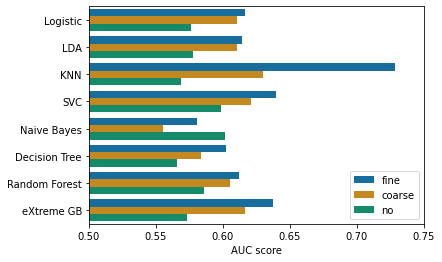

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, y='models', x='value',
            hue='variable', palette='colorblind')
plt.xlabel('AUC score')
# plt.xticks(rotation=90);
plt.legend(loc='lower right')
plt.xlim(0.5, 0.75)
plt.ylabel('')

VIS_PATH = "../../../vis"
plt.savefig(f'{VIS_PATH}/results_classical', format='pdf', bbox_inches='tight')

<AxesSubplot:xlabel='models', ylabel='value'>

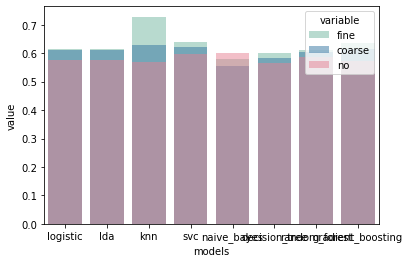

In [10]:
sns.barplot(data=fine_md, x='models', y='value',
            hue='variable', palette='Set2', alpha=0.5)
sns.barplot(data=coarse_md, x='models', y='value', hue='variable', alpha=0.5)
sns.barplot(data=no_seg_no_md, x='models', y='value',
            hue='variable', palette='husl', alpha=0.5)